# 12.6 决策树解决回归问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

## 12.6.1 决策树回归器
    - 非常容易过拟合

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
dt_reg.score(X_test, y_test)

0.6801941454497491

In [6]:
# 虽然训练数据集上的结果非常好，但测试数据集上非常差
dt_reg.score(X_train, y_train)

1.0

## 12.6.2 决策树回归器的学习曲线

#### 基于RMSE绘制学习曲线

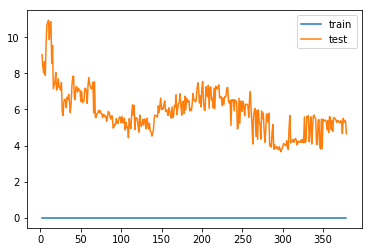

In [7]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(2, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()

plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

#### 基于R^2值绘制学习曲线

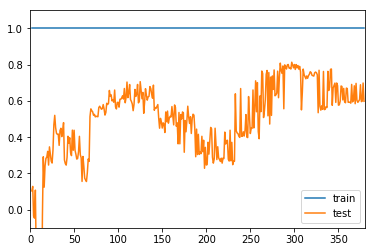

In [8]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(2, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               train_score, label="train")
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()
    
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

#### max_depth取1，3，5，20 比较学习曲线

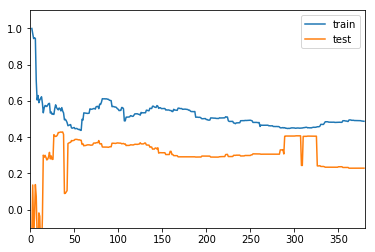

In [9]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

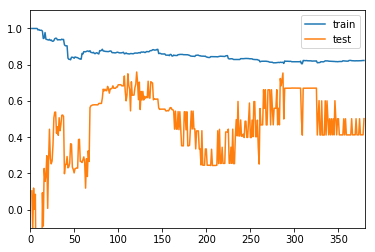

In [10]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

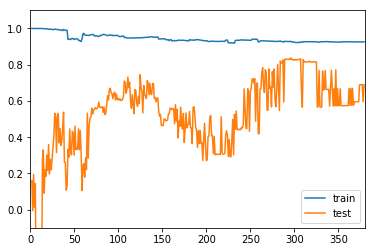

In [11]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

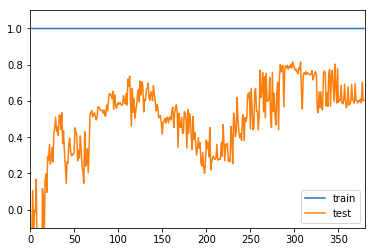

In [12]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=20), X_train, X_test, y_train, y_test)

## 12.6.3 决策树回归器的模型复杂度曲线

In [13]:
from sklearn.metrics import r2_score

#### maxSampleLeaf取100，500和 maxSamplesSplit取300 比较模型复杂度曲线

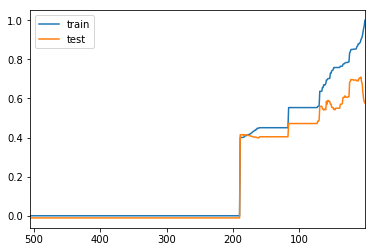

In [14]:
maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(506, 1)
plt.legend()
plt.show()

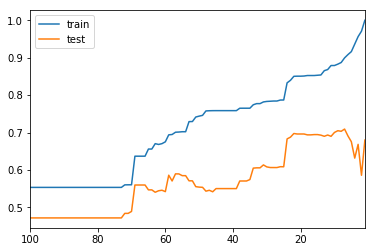

In [15]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(maxSampleLeaf, 1)
plt.legend()
plt.show()

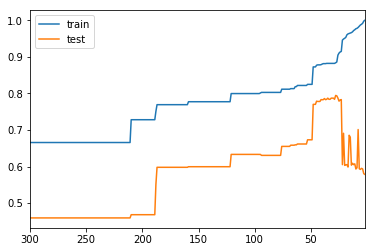

In [16]:
maxSamplesSplit = 300
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
plt.xlim(maxSamplesSplit, 2)
plt.legend()
plt.show()